<a href="https://colab.research.google.com/github/DamithaNuwanPremlalDNP/AI-ML_python/blob/main/SMS_SPAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SMS Spam detector

STEP1: Reading Data & Visualization

Import Modules

In [ ]:
import pandas as pd
import nltk

Read Dataset


In [ ]:
df = pd.read_csv("spam.csv", encoding="latin-1")

In [ ]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.shape

(5572, 2)

In [ ]:
#df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)''#
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True, errors='ignore')


In [ ]:
df.rename(columns={'v1':'class','v2':'sms'},inplace=True)
df.sample(5)

,class,sms
1313,ham,How abt making some of the pics bigger?
2854,ham,Your gonna be the death if me. I'm gonna leave...
799,ham,"\Gimme a few\"" was &lt;#&gt; minutes ago"""
2309,ham,"I have 2 sleeping bags, 1 blanket and paper an..."
2102,ham,Audrie lousy autocorrect


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('sms').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.groupby('class').describe()

sms                                                               
      count unique                                                top freq
class                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

In [ ]:
df = df.drop_duplicates(keep='first')

In [ ]:
df.groupby('class').describe()

sms                                                               
      count unique                                                top freq
class                                                                     
ham    4516   4516                         Rofl. Its true to its name    1
spam    653    653  This is the 2nd time we have tried 2 contact u...    1

Data Visualization

In [ ]:
df["Length"] = df["sms"].apply(len)

<ipython-input-17-6593e74a92d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Length"] = df["sms"].apply(len)


df.head(2)

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

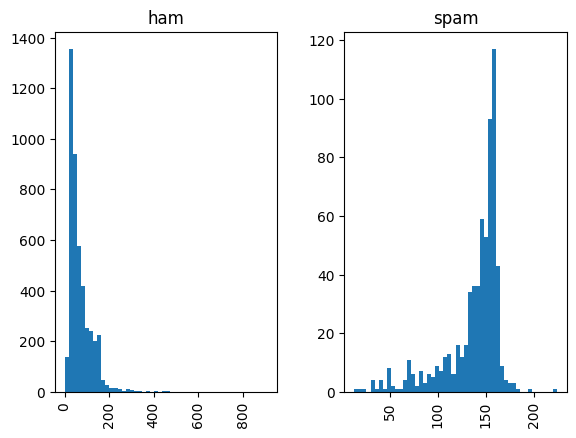

In [ ]:
df.hist(column='Length', by='class', bins=50)

Step 2- Preprocessing

In [ ]:
from nltk.stem.porter import PorterStemmer

nltk.download('stopwords')
from nltk.corpus import stopwords

nltk.download('punkt')
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df.head(5)

,class,sms,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


Preprocessing Tasks:


*   Lower Case
*   Tokenization
*   Removing Speacial characters
*   Removing stop words and puctuation
*   Stemming


In [ ]:
!pip install nltk
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Download punkt_tab

import string
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords


ps = PorterStemmer()

def clean_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
df['sms_cleaned'] = df['sms'].apply (clean_text)

In [ ]:
df.head(5)

,class,sms,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


Step 3 - Feature Extraction

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tf_vec = TfidfVectorizer(max_features=3000)
x = tf_vec.fit_transform(df['sms_cleaned']).toarray()

In [ ]:
x.shape

(5169, 3000)

Step 4 - Learning

In [ ]:
#from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test = train_test_split(x,Y,test_size=0.2,random_state=2)
from sklearn.model_selection import train_test_split

# Assign the 'class' column to the variable Y
Y = df['class']

# Now you can split the data
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size=0.2, random_state=2)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

MultinomialNB()

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
accuracy_score(y_test,y_pred)

0.9709864603481625